In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import io


# Read the dataset in the csv file from the URL


In [33]:

import requests
import pandas as pd

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

response = requests.get(URL)

if response.status_code == 200:
  df = pd.read_csv(io.StringIO(response.content.decode('utf-8')))
  print("Data downloaded successfully!")
else:
  print(f"Error downloading data. Status code: {response.status_code}")



Data downloaded successfully!


# Familiarizarse con el conjunto de datos


Familiarizarse con el conjunto de datos A continuación se describen las variables del conjunto de datos:

CRIM - tasa de delincuencia per cápita por ciudad
ZN - proporción de suelo residencial zonificado para lotes de más de 25.000 pies cuadrados.
INDUS - proporción de acres comerciales no minoristas por localidad.
CHAS - variable ficticia del río Charles (1 si el tracto linda con el río; 0 en caso contrario)
NOX - concentración de óxidos nítricos (partes por 10 millones)
RM - número medio de habitaciones por vivienda
AGE - proporción de unidades ocupadas por sus propietarios construidas antes de 1940
DIS - distancias ponderadas a cinco centros de empleo de Boston
RAD - índice de accesibilidad a las autopistas radiales
IMPUESTO - tasa del impuesto sobre bienes inmuebles de valor íntegro por 10.000 dólares
PTRATIO - proporción alumnos-profesor por ciudad
LSTAT - % más bajo de la población
MEDV - valor medio de las viviendas ocupadas por sus propietarios en miles de dólares

In [34]:

df = df.drop("Unnamed: 0", axis=1)

df.head(10)



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


Text(0, 0.5, 'Miles de USD $')

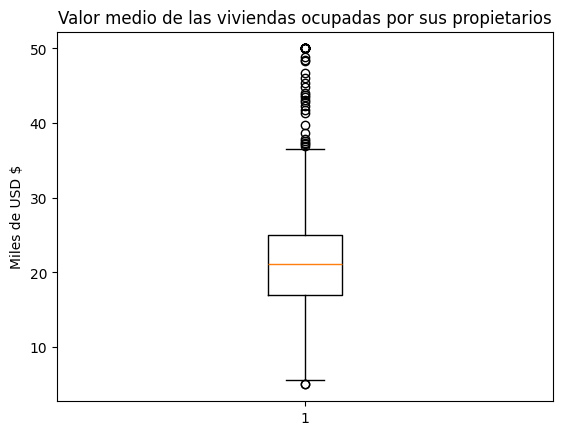

In [36]:

plt.boxplot(df["MEDV"])
plt.title("Valor medio de las viviendas ocupadas por sus propietarios")
plt.ylabel("Miles de USD $")


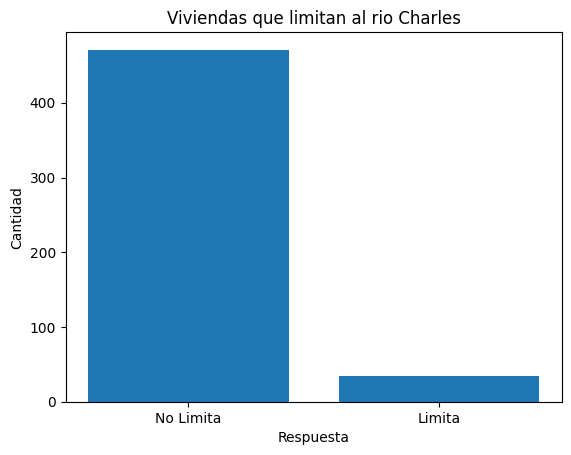

In [37]:


counts = df["CHAS"].value_counts()

plt.bar(counts.index, counts.values)
plt.xticks(counts.index, ['No Limita', 'Limita'])
plt.xlabel('Respuesta')
plt.ylabel('Cantidad')
plt.title('Viviendas que limitan al rio Charles')
plt.show()


# La mayoria de las viviendas no limita con el rio Charles



In [38]:


df.loc[(df["AGE"]<=35),'age_group'] = '35 years and younger'
df.loc[(df["AGE"]>35)&(df["AGE"]<70), 'age_group'] = 'between 35 and 70 years'
df.loc[(df["AGE"]>=70),'age_group'] = '70 years and older'
df.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


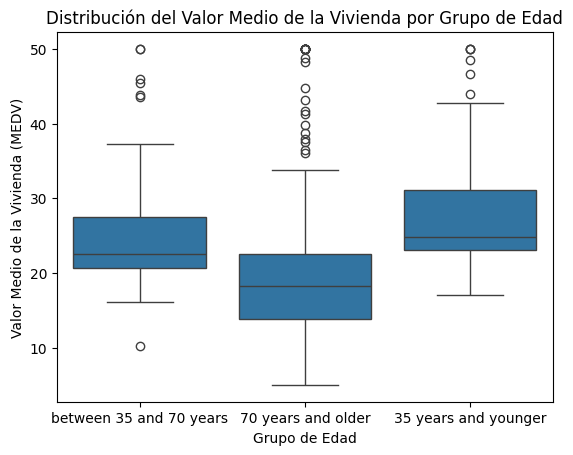

In [39]:

sns.boxplot(x='age_group', y='MEDV', data=df)
plt.xlabel('Grupo de Edad')
plt.ylabel('Valor Medio de la Vivienda (MEDV)')
plt.title('Distribución del Valor Medio de la Vivienda por Grupo de Edad')
plt.show()


Text(0, 0.5, 'Proporción de acres comerciales no minoristas')

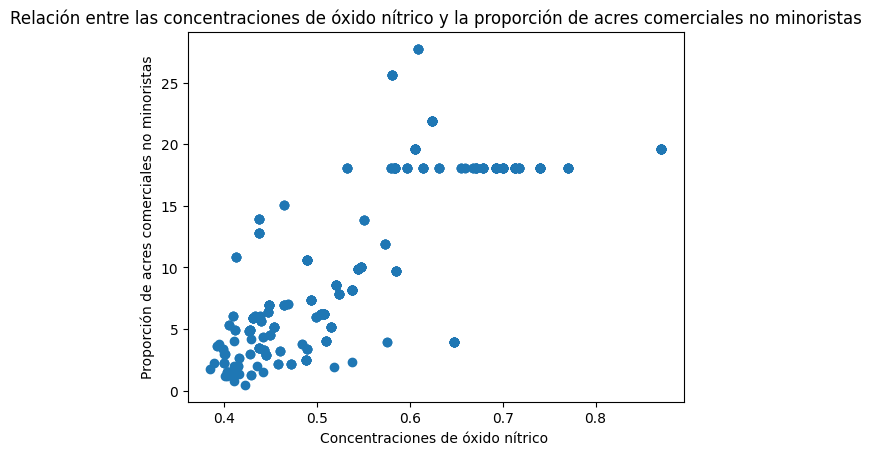

In [40]:


plt.scatter(df["NOX"],df["INDUS"])
plt.title("Relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas")
plt.xlabel("Concentraciones de óxido nítrico ")
plt.ylabel("Proporción de acres comerciales no minoristas")


Text(0, 0.5, 'Cantidad alumnos')

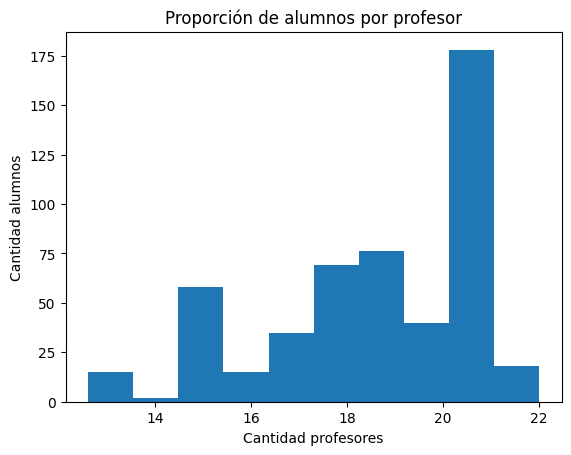

In [41]:


plt.hist(df["PTRATIO"])
plt.title("Proporción de alumnos por profesor")
plt.xlabel("Cantidad profesores")
plt.ylabel("Cantidad alumnos")


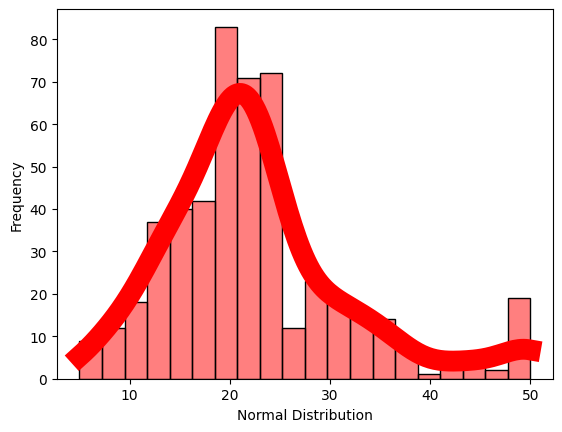

In [42]:
ax = sns.histplot(df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  line_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Normal Distribution', ylabel='Frequency')
plt.show()

In [43]:
scipy.stats.levene(df[df['CHAS'] == 0]['MEDV'],
                   df[df['CHAS'] == 1]['MEDV'], center='mean')



LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [44]:

grupo_A = df[df['CHAS'] == 0]['MEDV']
grupo_B = df[df['CHAS'] == 1]['MEDV']

# Realizar la prueba T
t_statistic, p_value = scipy.stats.ttest_ind(grupo_A, grupo_B, equal_var =False)

print('Estadístico T:', t_statistic)
print('Valor p:', p_value)



alpha = 0.05
if p_value < alpha:
    print(' la hipótesis nula. Hay una diferencia significativa entre los grupos.')
else:
    print('No podemos rechazar la hipótesis nula. No hay evidencia suficiente para concluir que hay una diferencia significativa.')


Estadístico T: -3.113291312794837
Valor p: 0.0035671700981375174
 la hipótesis nula. Hay una diferencia significativa entre los grupos.


In [45]:


scipy.stats.levene(df[df['age_group'] == '35 years and younger']['MEDV'],
                   df[df['age_group'] == 'between 35 and 70 years']['MEDV'],
                   df[df['age_group'] == '70 years and older']['MEDV'],
                   center='mean')



LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [46]:


thirtyfive_lower = df[df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = df[df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = df[df['age_group'] == '70 years and older']['MEDV']


In [47]:


f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))


F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [48]:
pearson_correlation, p_value = scipy.stats.pearsonr(df['NOX'], df['INDUS'])

print("Pearson Correlation Coefficient:", pearson_correlation)
print("P-Value:", p_value)

Pearson Correlation Coefficient: 0.763651446920915
P-Value: 7.913361061241532e-98


# Rechazamos la hipótesis nula.
¿Cuál es el impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston sobre el valor medio de las viviendas ocupadas por sus propietarios? (Análisis de regresión)

In [57]:
X = df['DIS']

y = df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
summary_text = model.summary().as_text()
print(summary_text)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        19:22:16   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0




Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
El modelo de regresión lineal simple se ajusta a los datos, aunque el R-cuadrado ajustado (0.061) indica que solo el 6.1% de la variabilidad en MEDV puede ser explicada por la variable DIS. Esto significa que hay una relación débil entre ambas variables.

El coeficiente de DIS (1.0916) es positivo y estadísticamente significativo (p-valor < 0.05). Esto indica que a medida que aumenta la distancia a centros de empleo (DIS), el valor medio de las viviendas (MEDV) también tiende a aumentar. Sin embargo, dado el bajo R-cuadrado, el efecto de DIS en MEDV es relativamente pequeño.